In [86]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt # plotting
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [87]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')

## Data Exploration

###### The first 5 rows of the data we noticed the Date and Time column that we have to fix

In [88]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [89]:
df.shape

(1000, 17)

In [90]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [91]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


## No Null values

##### We don't  find any NULL values in our Data

In [92]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

## The information

### We found that:
- Float  = 7
- Inti     = 1
- Object = 9

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

## Branches in Cities

- We found that in Yangon wich is Branch A is the most Branch that is dominating in term of high parcipating.

In [94]:
df.Branch.value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [95]:
df.City.value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [96]:
df.Gender.value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

## Dealing with date

- We have to import the datetime library as dt inoder to convect the date and time into datetime

In [97]:
import datetime as dt

## converting date to date time

In [98]:
#we convert date to datetime to make things little bit easy to read

df['Date'] = pd.to_datetime(df['Date'])

In [99]:
#we have to confirm the change
df['Date'].dtype

dtype('<M8[ns]')

In [100]:
#we convert the time to datetime and confirm the changes

df['Time'] = pd.to_datetime(df['Time'])
df['Time'].dtypes

dtype('<M8[ns]')

## We have to extract feacture from Date Time

In [101]:
#We going to start with extracting the day and confirm the changes
df['Day'] = df['Date'].dt.day
df['Day'].dtypes

#Second will be the month
df['Month'] = df['Date'].dt.month
df['Month'].dtypes

#Third will the year
df['Year'] = df['Date'].dt.year
df['Year'].dtypes

#Fourth will be the Hour
df['Hour'] = df['Time'].dt.hour
df['Hour'].dtypes

dtype('int64')

In [102]:
#As we can see the Time has changed
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,2022-11-21 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,2022-11-21 10:29:00,Cash,76.40,4.761905,3.8200,9.6,8,3,2019,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,2022-11-21 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,2022-11-21 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,2022-11-21 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019,10


## Weekdays

- We are checking which is the busyest day in a week.

In [103]:
#Let find the days in week
df['weekday']=df['Date'].dt.day_name()

In [104]:
#How much the shop is making in each day
Dayz= df.groupby('weekday')[['gross income']].sum().reset_index()
Dayz

,weekday,gross income
0,Friday,2091.7305
1,Monday,1804.7180
2,Saturday,2672.4195
3,Sunday,2117.0425
4,Thursday,2159.4880
5,Tuesday,2451.5355
6,Wednesday,2082.4350


##### Saturday is the busy day in a week

In [105]:
#11 Hours a day the store is opened
df['Hour'].nunique()

11

## Checking the Category columns in this data

In [106]:
category_columns = [col for col in df.columns if df[col].dtype =="object"]
category_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment',
 'weekday']

## Let get the unique values of the categories columns and counts them

### Branches

In [107]:
df['Branch'].unique().tolist()

['A', 'C', 'B']

In [108]:
df.Branch.value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

## Cities

In [109]:
df['City'].unique().tolist()

['Yangon', 'Naypyitaw', 'Mandalay']

In [110]:
df.City.value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

## Customer types

In [111]:
df['Customer type'].unique().tolist()

['Member', 'Normal']

In [112]:
df['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

## Product line

In [113]:
df['Product line'].unique().tolist()

['Health and beauty',
 'Electronic accessories',
 'Home and lifestyle',
 'Sports and travel',
 'Food and beverages',
 'Fashion accessories']

In [114]:
df['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

## The payments

In [115]:
df['Payment'].unique().tolist()

['Ewallet', 'Cash', 'Credit card']

In [116]:
df.Payment.value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

## We grouping by Cities

In [117]:
cities = df.groupby(['City'])

In [118]:
cities.agg('sum')

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
City,,,,,,,,,,,,
Mandalay,18478.88,1820,5057.0320,106197.6720,101140.64,1580.952381,5057.0320,2263.6,5068,665,670308,5029
Naypyitaw,18567.76,1831,5265.1765,110568.7065,105303.53,1561.904762,5265.1765,2319.9,4956,640,662232,4894
Yangon,18625.49,1859,5057.1605,106200.3705,101143.21,1619.047619,5057.1605,2389.2,5232,688,686460,4987


#### Mandalay has the lowest Unit Price,Quantity,gross margin percentage,gross income and Rating 
#### Naypyitaw has high TAX,Total and gross income and has lest Rating than Yangon.

In [119]:
branch=df.groupby('Branch')[['Rating']].mean().reset_index()
branch

,Branch,Rating
0,A,7.027059
1,B,6.818072
2,C,7.072866


#### C is the most rated branch

In [120]:
gross_income=df.groupby('City')[['gross income', 'Branch']].max().reset_index()
gross_income

,City,gross income,Branch
0,Mandalay,48.69,B
1,Naypyitaw,49.65,C
2,Yangon,49.49,A


#### Branch C wich is Naypyitaw is the most branch that has high gross Income

## Data Visualisation

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Friday'),
  Text(1, 0, 'Monday'),
  Text(2, 0, 'Saturday'),
  Text(3, 0, 'Sunday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Tuesday'),
  Text(6, 0, 'Wednesday')])

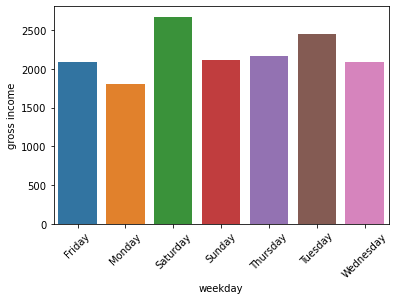

In [121]:
sns.barplot(x='weekday',y='gross income',data=Dayz)
plt.xticks(rotation=45)

#### As we can see that Saturday is most busy day folowed by Tuesday

In [122]:
branches = df.groupby('Branch')

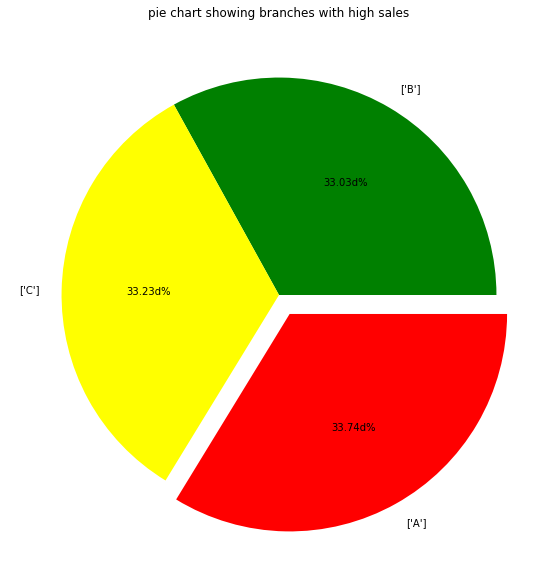

In [123]:
plt.figure(figsize=(15,10))
colors = ['green', 'yellow', 'red']
explode = (0, 0, 0.1)
dfb =  cities['Branch'].unique().tolist()
df1 = cities['Quantity'].sum()
plt.pie(df1,explode=explode,labels=dfb, autopct= '%2.2fd%%', colors=colors)
plt.title('pie chart showing branches with high sales')
plt.savefig('super1.png')

#### Branch A is the most branch that has highest pecentage of sales of 33.74%

# Payment 

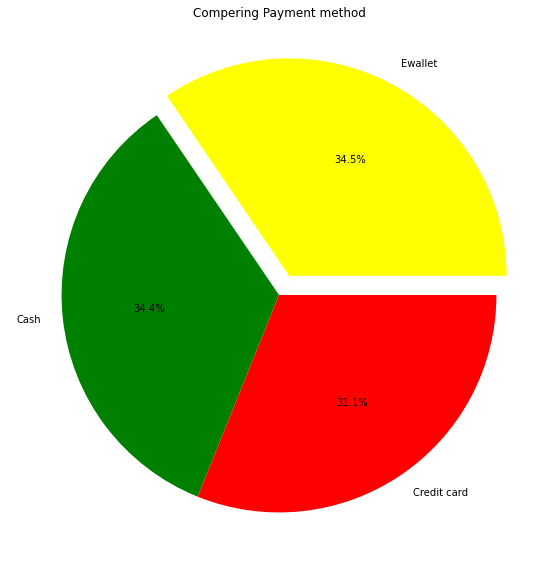

In [124]:
plt.figure(figsize=(15,10))
colors =['yellow', 'green', 'red']
explode = (0.1, 0, 0)
dfp = df['Payment'].unique().tolist()
dfd = df['Payment'].value_counts()
plt.pie(dfd,explode=explode,labels=dfp, autopct= '%2.1f%%', colors=colors)
plt.title('Compering Payment method')
plt.savefig('super2,png')

#### The payment that is most used is Ewallet with 34.5%

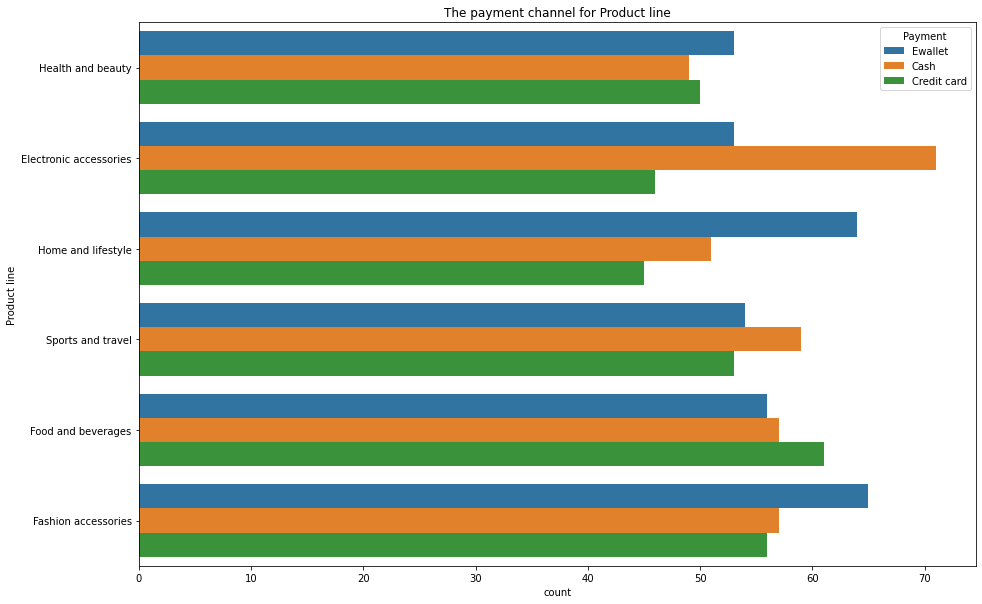

In [125]:
plt.figure(figsize= (15,10))
sns.countplot(y= 'Product line', data= df,hue='Payment').set(title='The payment channel for Product line')
plt.savefig('super3.png')

## Payment methods

### Health and beauty

- Ewallet is the most used method followed by Credit cards and Cash is not used more aften.
#### My view:
- Peoploe they can buy Health and beauty product online withought them going to the shop.So in that case we expect online payment to be high than Cash and Credit cards.

### Electronic accessories

- Cash is the most used payment method followed by Ewallet and Credit cards are not used aften. 
#### My view:
- In the case of Electronic accessories we expect people that they may want to make sure that the Electronic accessories product they bought is working according their expection. The product testing is requred so in terms of payment it would be cash as the customers are walking in the shop and it should be followed by Credit cards payments, but we not supprised to find second preferable payment method is Ewallet as technology take place.

### Home and lifestyle

- Ewallet is the most used payment method followed by Cash and Credit cards are not used aften.

### Sports and trave

- Cash the is the most used payment method followed by Ewallet and Credit cards are not used aten.

### Food and beverages

- Credit cards are the most used payment method followed by Cash and Ewallet is not used aftan.

### Fashion accessories

- Ewallet is the most used payment method followed by Cash and Credit card are not used afan.

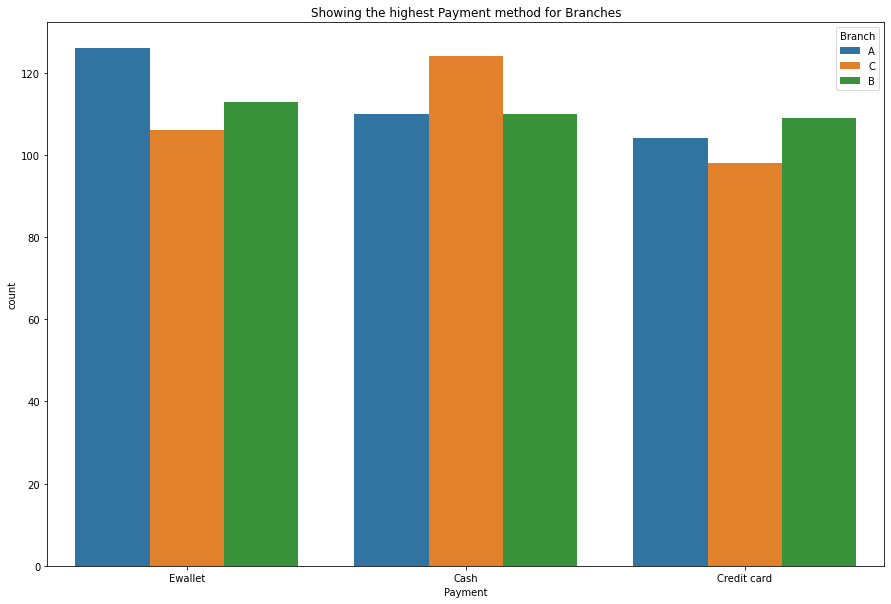

In [126]:
plt.figure(figsize=(15,10))
sns.countplot('Payment', data=df, hue='Branch').set(title=('Showing the highest Payment method for Branches'))
plt.savefig('super4.png')

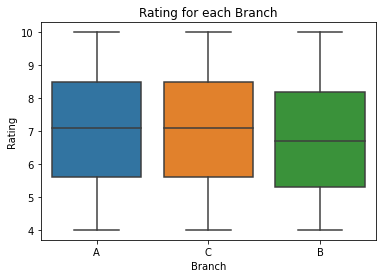

In [127]:
sns.boxplot(x='Branch', y='Rating', data=df).set(title='Rating for each Branch')
plt.savefig('super5.png')

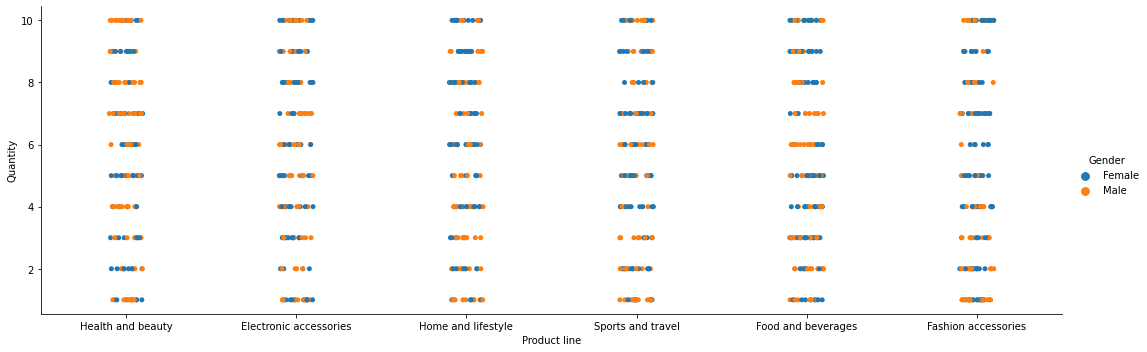

In [128]:
sns.catplot(x='Product line', y='Quantity', data=df, hue='Gender', aspect=3)
plt.savefig('super6')

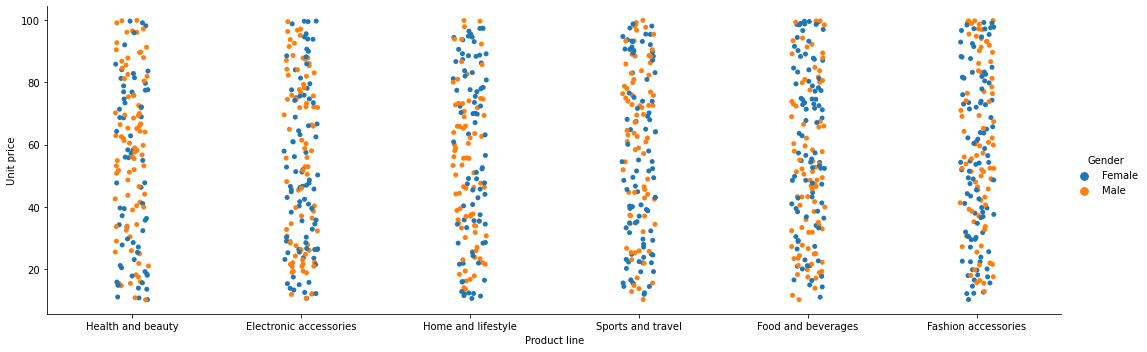

In [129]:
sns.catplot(x='Product line', y='Unit price', data=df, hue='Gender', aspect=3)
plt.savefig('Super7.png')

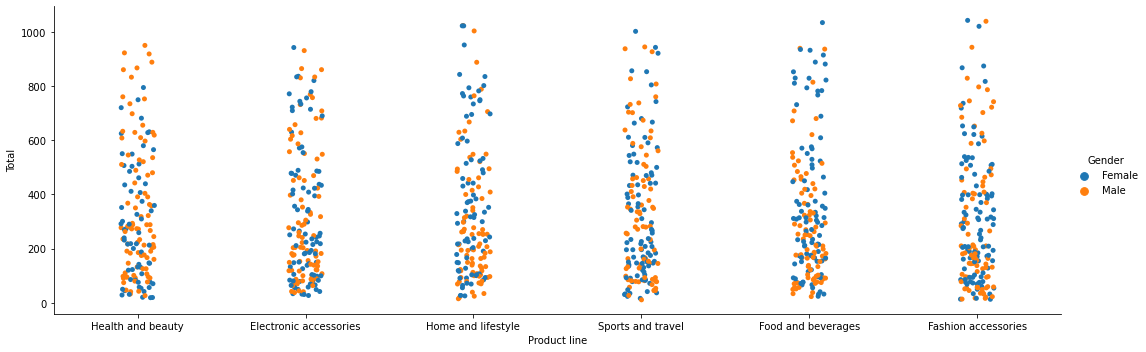

In [130]:
sns.catplot(x='Product line', y='Total', data=df, hue='Gender', aspect=3)
plt.savefig('Super8.png')

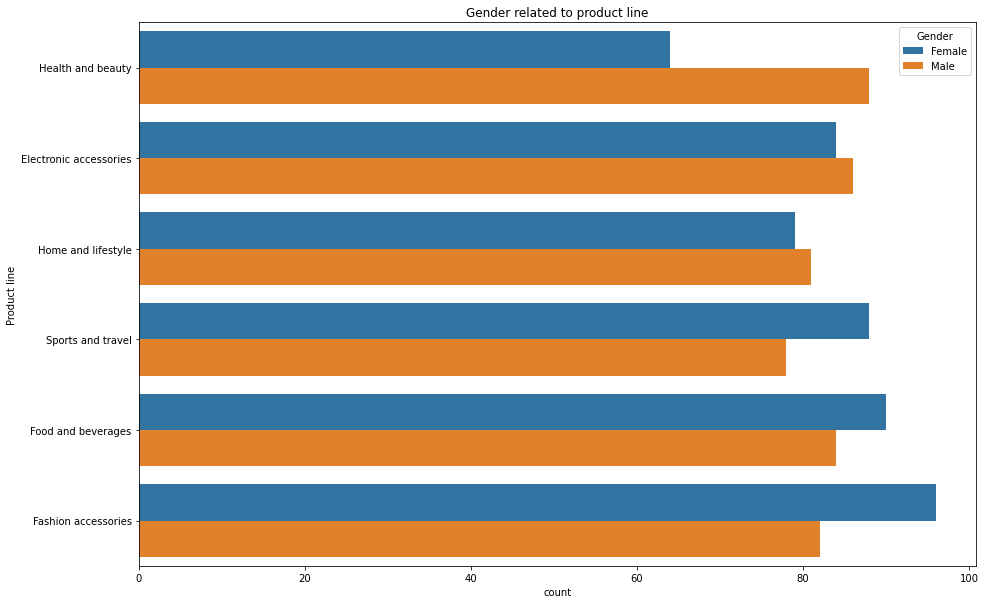

In [131]:
plt.figure(figsize=(15,10))
sns.countplot(y='Product line', data=df, hue='Gender').set(title='Gender related to product line')
plt.savefig('super9.png')

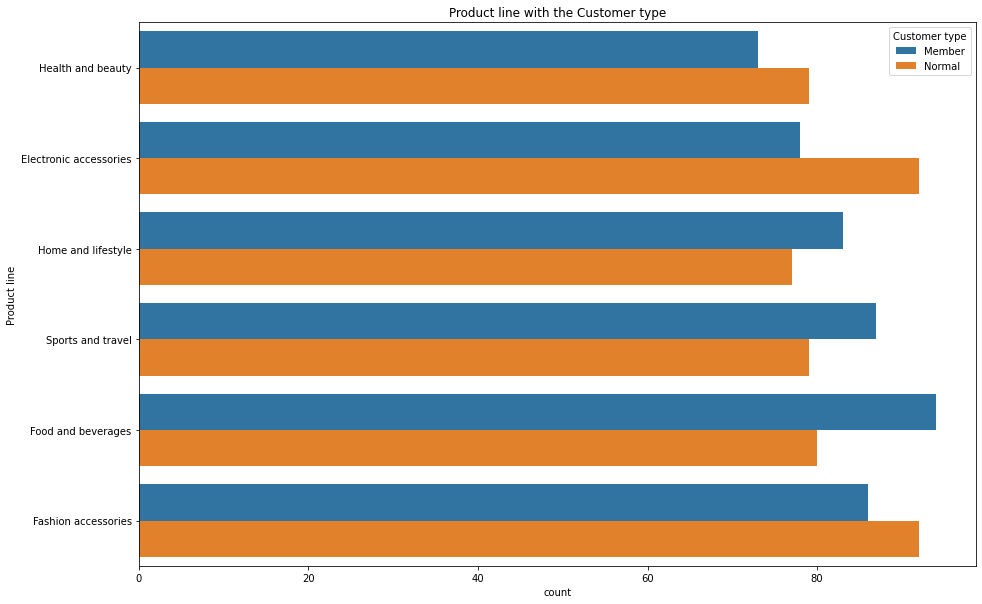

In [132]:
plt.figure(figsize=(15,10))
sns.countplot(y='Product line', data=df, hue='Customer type').set(title='Product line with the Customer type')
plt.savefig('super10.png')

In [133]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour,weekday
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019,13,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,Cash,76.40,4.761905,3.8200,9.6,8,3,2019,10,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019,13,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019,20,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019,10,Friday


In [134]:
df.shape

(1000, 22)

In [135]:
df['Unit price'].max()

99.96

In [136]:
df['Unit price'].min()

10.08

## Data Cleaning

### Kurtosis

##### We have to check the kurtosis inoder  to discover outliers.If the Kurtosis is above >3 that means we have outliers in this case it seems like we do not have any outliers in our data.

In [137]:
df.kurtosis()

Unit price                -1.218591
Quantity                  -1.215547
Tax 5%                    -0.081885
Total                     -0.081885
cogs                      -0.081885
gross margin percentage    0.000000
gross income              -0.081885
Rating                    -1.151587
Day                       -1.226543
Month                     -1.566889
Year                       0.000000
Hour                      -1.256451
dtype: float64

### Skew

- Highly positive = x > 1
- Highly negative = x < -1
- Moderate positive = 0.5 < x < 1
- Moderate negative = -1 < x < -0.5
- Fairly symetrical = -0.5 < x < 0.5

##### We find that our data is Moderate Positive Skew

In [138]:
df.skew()

Unit price                 0.007077
Quantity                   0.012941
Tax 5%                     0.892570
Total                      0.892570
cogs                       0.892570
gross margin percentage    0.000000
gross income               0.892570
Rating                     0.009010
Day                        0.049749
Month                      0.013144
Year                       0.000000
Hour                       0.025787
dtype: float64

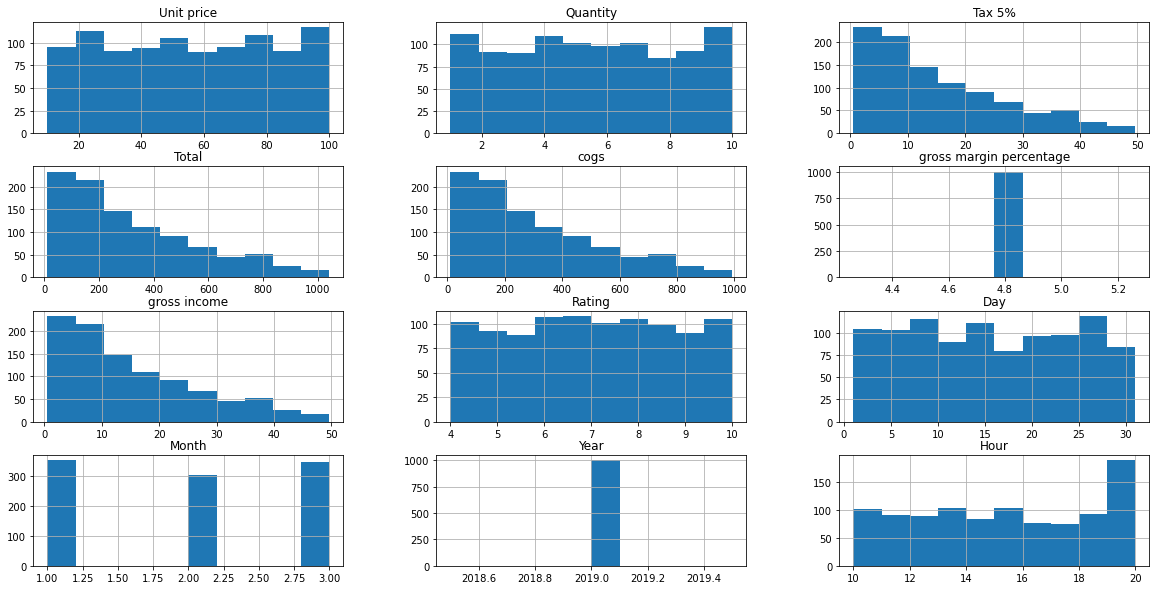

In [139]:
numerical_feacture = df.describe().columns.to_list()
df[numerical_feacture].hist(figsize=(20,10));

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

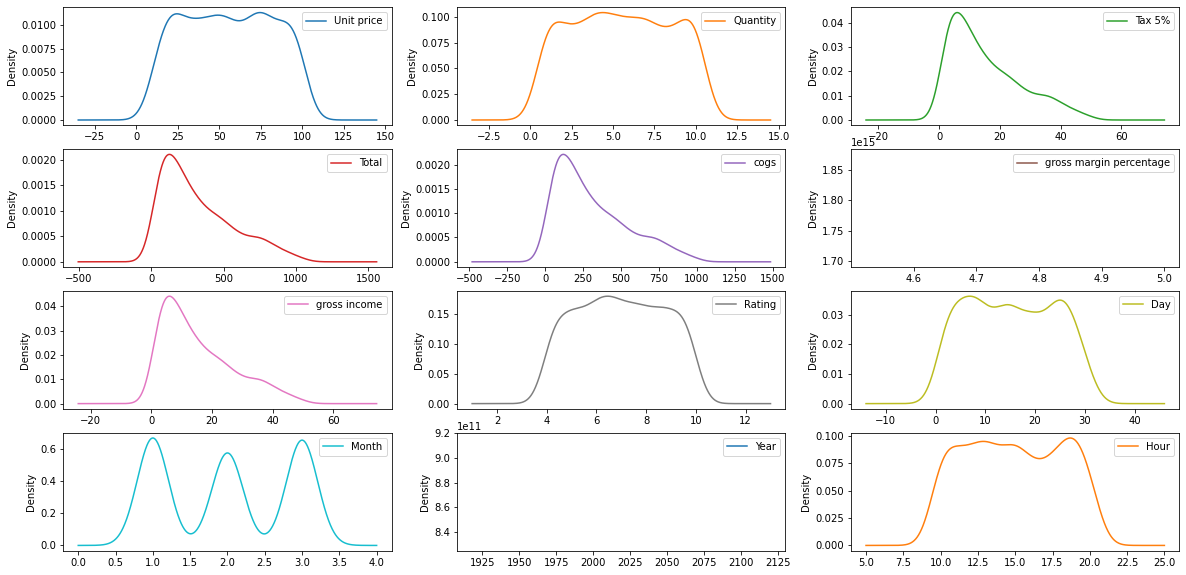

In [140]:
df[numerical_feacture].plot(kind='density', subplots =True, layout=(4,3), sharex=False, figsize=(20,10))

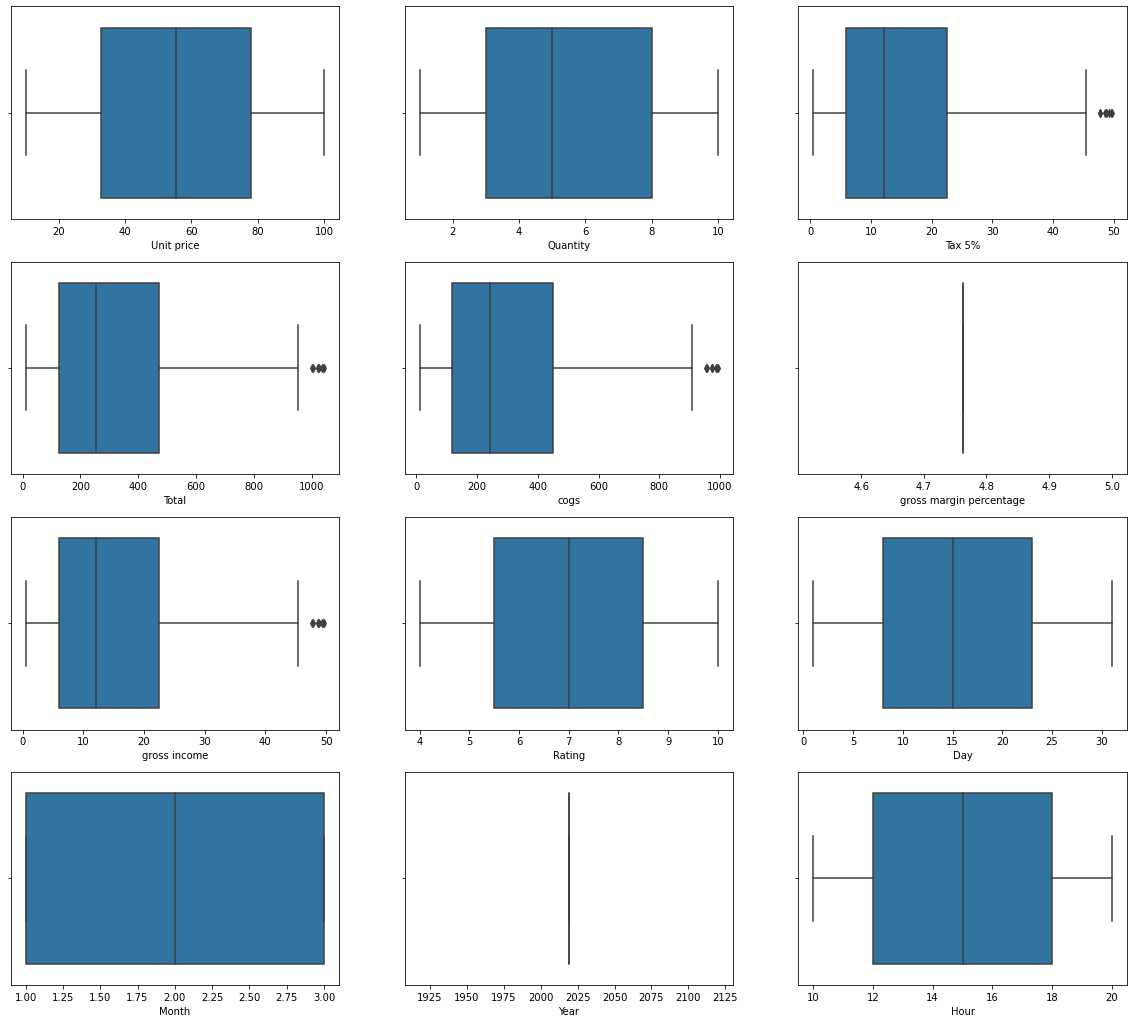

In [141]:
fig, axes = plt.subplots(4,3, figsize = (20,18))

sns.boxplot(ax = axes[0, 0], x = numerical_feacture[0], data=df)
sns.boxplot(ax = axes[0, 1], x = numerical_feacture[1], data=df)
sns.boxplot(ax = axes[0, 2], x = numerical_feacture[2], data=df)
sns.boxplot(ax = axes[1, 0], x = numerical_feacture[3], data=df)
sns.boxplot(ax = axes[1, 1], x = numerical_feacture[4], data=df)
sns.boxplot(ax = axes[1, 2], x = numerical_feacture[5], data=df)
sns.boxplot(ax = axes[2, 0], x = numerical_feacture[6], data=df)
sns.boxplot(ax = axes[2, 1], x = numerical_feacture[7], data=df)
sns.boxplot(ax = axes[2, 2], x = numerical_feacture[8], data=df)
sns.boxplot(ax = axes[3, 0], x = numerical_feacture[9], data=df)
sns.boxplot(ax = axes[3, 1], x = numerical_feacture[10], data=df)
sns.boxplot(ax = axes[3, 2], x = numerical_feacture[11], data=df);

In [145]:
df.corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778,0.057021,-0.027387,NaN,0.008242
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815,-0.043347,-0.014524,NaN,-0.007317
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002515,-0.022301,NaN,-0.002770
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002515,-0.022301,NaN,-0.002770
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002515,-0.022301,NaN,-0.002770
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442,-0.002515,-0.022301,NaN,-0.002770
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000,-0.007076,-0.042880,NaN,-0.030588
Day,0.057021,-0.043347,-0.002515,-0.002515,-0.002515,NaN,-0.002515,-0.007076,1.000000,-0.118996,NaN,0.020668
Month,-0.027387,-0.014524,-0.022301,-0.022301,-0.022301,NaN,-0.022301,-0.042880,-0.118996,1.000000,NaN,0.043762


In [146]:
nun_df = df[df.isnull().any(axis=1)]
nun_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour,weekday


In [142]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

Unit price                  45.060000
Quantity                     5.000000
Tax 5%                      16.520375
Total                      346.927875
cogs                       330.407500
gross margin percentage      0.000000
gross income                16.520375
Rating                       3.000000
Day                         15.000000
Month                        2.000000
Year                         0.000000
Hour                         6.000000
dtype: float64

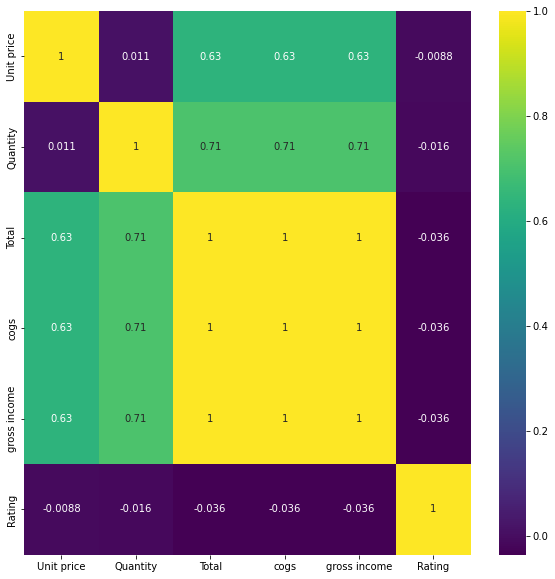

In [148]:
df = df[['Unit price', 'Quantity', 'Total', 'cogs', 'gross income',
       'Rating']]

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')
plt.show()

In [149]:
df.head()

,Unit price,Quantity,Total,cogs,gross income,Rating
0,74.69,7,548.9715,522.83,26.1415,9.1
1,15.28,5,80.2200,76.40,3.8200,9.6
2,46.33,7,340.5255,324.31,16.2155,7.4
3,58.22,8,489.0480,465.76,23.2880,8.4
4,86.31,7,634.3785,604.17,30.2085,5.3


In [152]:
df.columns

Index(['Unit price', 'Quantity', 'Total', 'cogs', 'gross income', 'Rating'], dtype='object')

In [151]:
df

AttributeError: 'list' object has no attribute 'head'